## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [24]:
!pip install pandas_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [ ]:
start_date = datetime.datetime(2017, 1, 1)
end_date = datetime.datetime(2018, 12, 31)
symbol = "AAPL"
try: data = pdr.get_data_yahoo(symbol, start_date, end_date)
except: print("Неккоректный ввод")

plt.figure(figsize=(16, 8))
plt.title(f'Цены акций {symbol} с {start_date.strftime("%Y-%m-%d")} по {end_date.strftime("%Y-%m-%d")}')
plt.plot(data['Open'])
plt.xlabel('Дата')
plt.ylabel('Цена ($)')
plt.show()

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

In [ ]:
plt.figure(figsize=(10, 5))
plt.title(f'Boxplot максимальной цены акций {symbol} с {start_date.strftime("%Y-%m-%d")} по {end_date.strftime("%Y-%m-%d")}')
plt.boxplot(data['High'])
plt.xlabel('Apple')
plt.ylabel('Цена ($)')
plt.show()

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

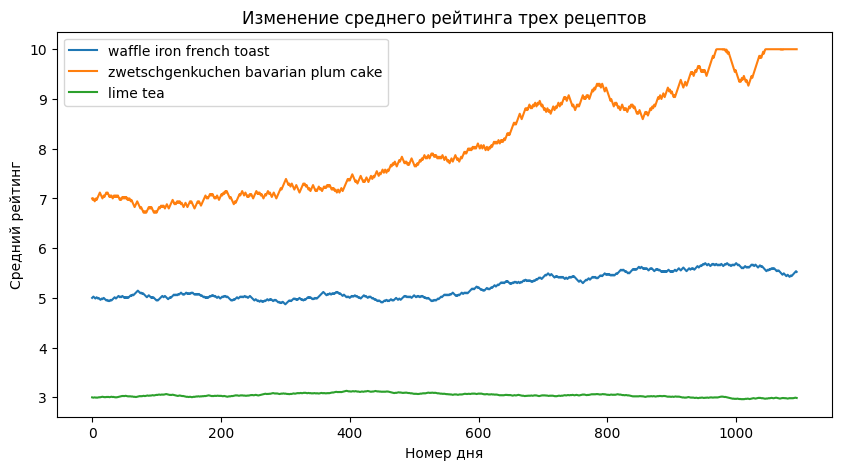

In [31]:
recipes = {0: "waffle iron french toast", 1: "zwetschgenkuchen bavarian plum cake", 2: "lime tea"}
data = np.load('average_ratings.npy')
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlabel('Номер дня')
ax.set_ylabel('Средний рейтинг')
ax.set_title('Изменение среднего рейтинга трех рецептов')

for i in range(3):
    ax.plot(data[i], label=f'{recipes[i]}')
ax.legend()
plt.show()

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


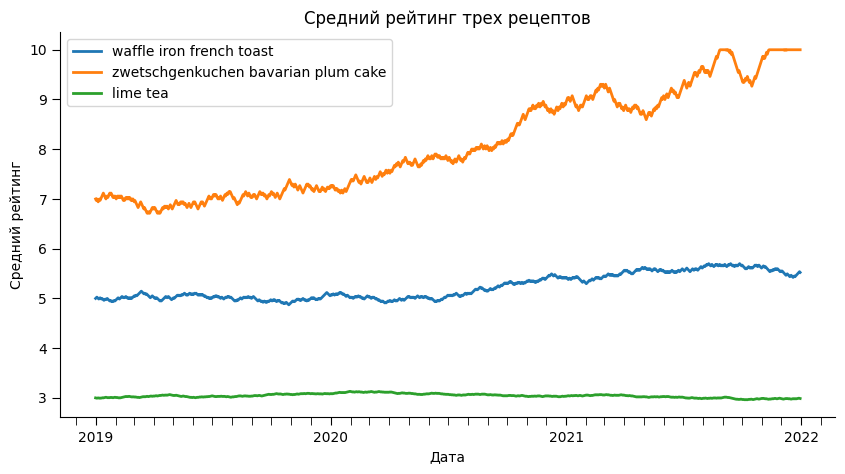

In [35]:
import matplotlib.dates as mdates

ratings = np.load('average_ratings.npy')
dates = pd.date_range('2019-01-01', '2021-12-30', freq='D')
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y') 

fig, ax = plt.subplots(figsize=(10, 5))
for i, recipe in enumerate(ratings):
  ax.plot(dates, recipe, label=f"{recipes[i]}", linewidth=2)

ax.set_title("Средний рейтинг трех рецептов")
ax.set_ylabel("Средний рейтинг")
ax.legend()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_major_formatter(years_fmt)
ax.set_xlabel("Дата")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(axis="both", which="both", length=6, labelsize=10)

plt.show()

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

<ipython-input-44-c6326674a77f>:11: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dates = pd.date_range(start='1/1/2019', end='30/12/2021')


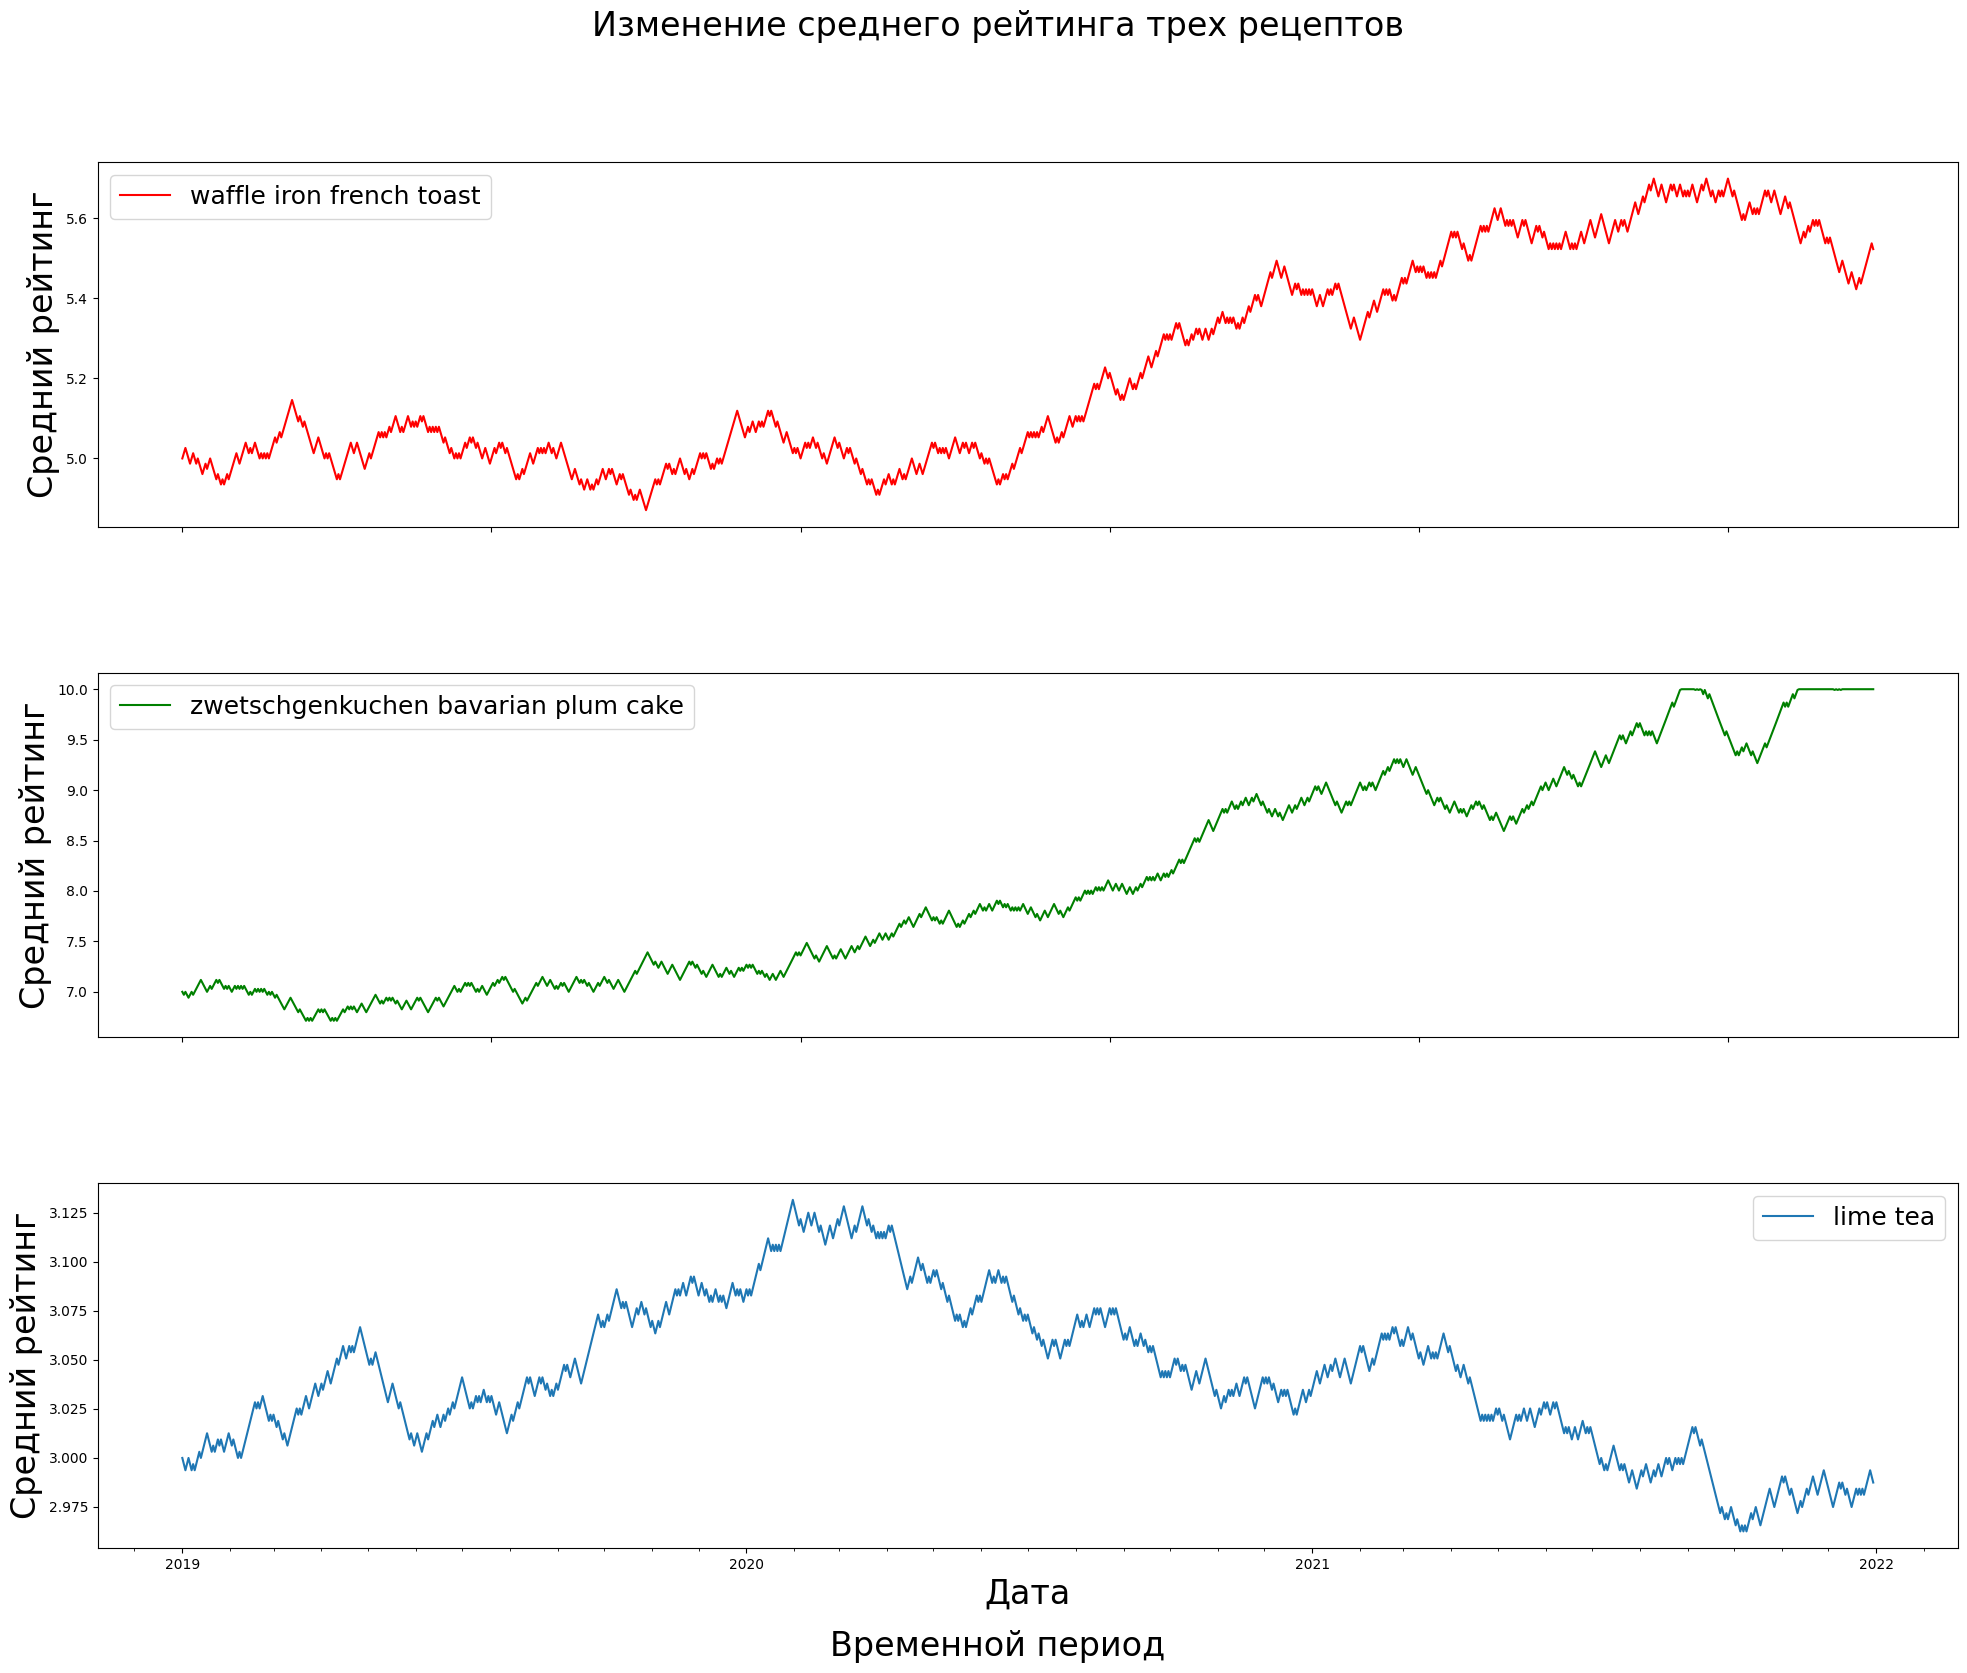

In [44]:
fig, axes = plt.subplots(3, 1, figsize=(24, 18))

for i, ax in enumerate(axes.flatten()):
    if i == 0:
        y_line, = ax.plot(data[i], 'r', label=recipes[i])
        ax.set_xticklabels([])
    elif i == 1:
        y_line, = ax.plot(data[i], 'g', label=recipes[i])
        ax.set_xticklabels([])
    else:
        dates = pd.date_range(start='1/1/2019', end='30/12/2021')
        y_line, = ax.plot(dates, data[i], label=recipes[i])
        ax.xaxis.set_major_locator(mdates.YearLocator())
        ax.xaxis.set_minor_locator(mdates.MonthLocator())
        ax.set_xlabel('Дата', fontsize=24)
    ax.set_ylabel('Средний рейтинг', fontsize=24)
    ax.legend(handles=[y_line], fontsize=18)

plt.subplots_adjust(hspace=0.4)
fig.text(0.5, 0.05, 'Временной период', ha='center', fontsize=24)
fig.text(0.5, 0.95, 'Изменение среднего рейтинга трех рецептов', ha='center', fontsize=24)
plt.show()

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


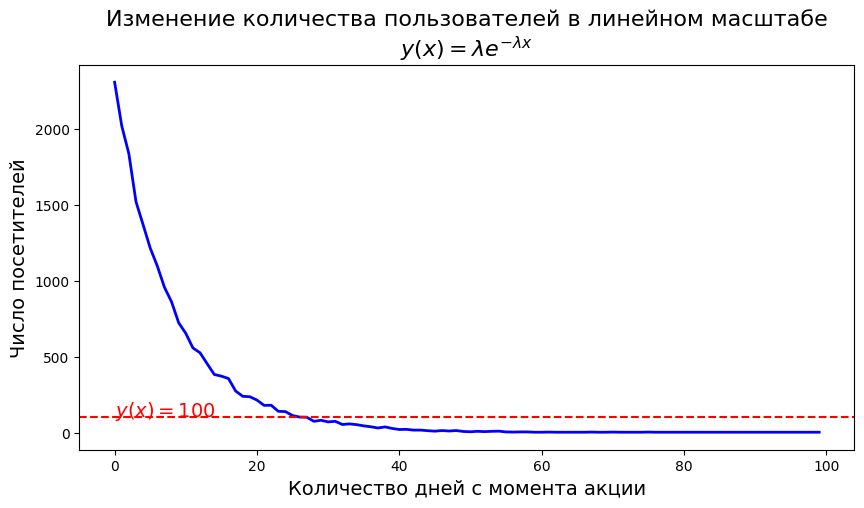

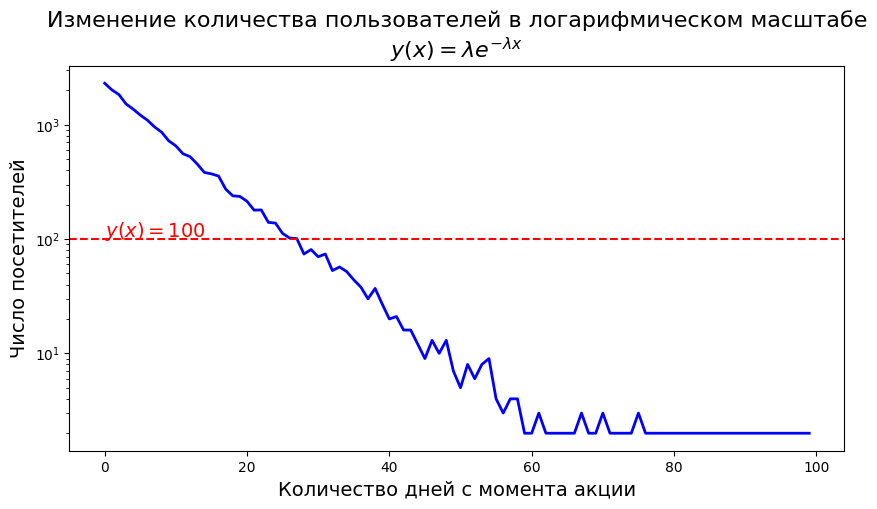

In [46]:
visitors = np.load('visitors.npy')
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(visitors, color='blue', linewidth=2)
ax.axhline(y=100, color='red', linestyle='--')
ax.text(0, 105, r'$y(x)=100$', fontsize=14, color='red')
ax.set_xlabel('Количество дней с момента акции', fontsize=14)
ax.set_ylabel('Число посетителей', fontsize=14)
ax.set_title('Изменение количества пользователей в линейном масштабе\n$y(x)=\lambda e^{-\lambda x}$', fontsize=16)

fig, ax = plt.subplots(figsize=(10, 5))
ax.semilogy(visitors, color='blue', linewidth=2)
ax.axhline(y=100, color='red', linestyle='--')
ax.text(0, 105, r'$y(x)=100$', fontsize=14, color='red')
ax.set_xlabel('Количество дней с момента акции', fontsize=14)
ax.set_ylabel('Число посетителей', fontsize=14)
ax.set_title('Изменение количества пользователей в логарифмическом масштабе\n$y(x)=\lambda e^{-\lambda x}$', fontsize=16)

plt.show()

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [47]:
reviews = pd.read_csv('reviews_sample.csv')
recipes = pd.read_csv('recipes_sample.csv')

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

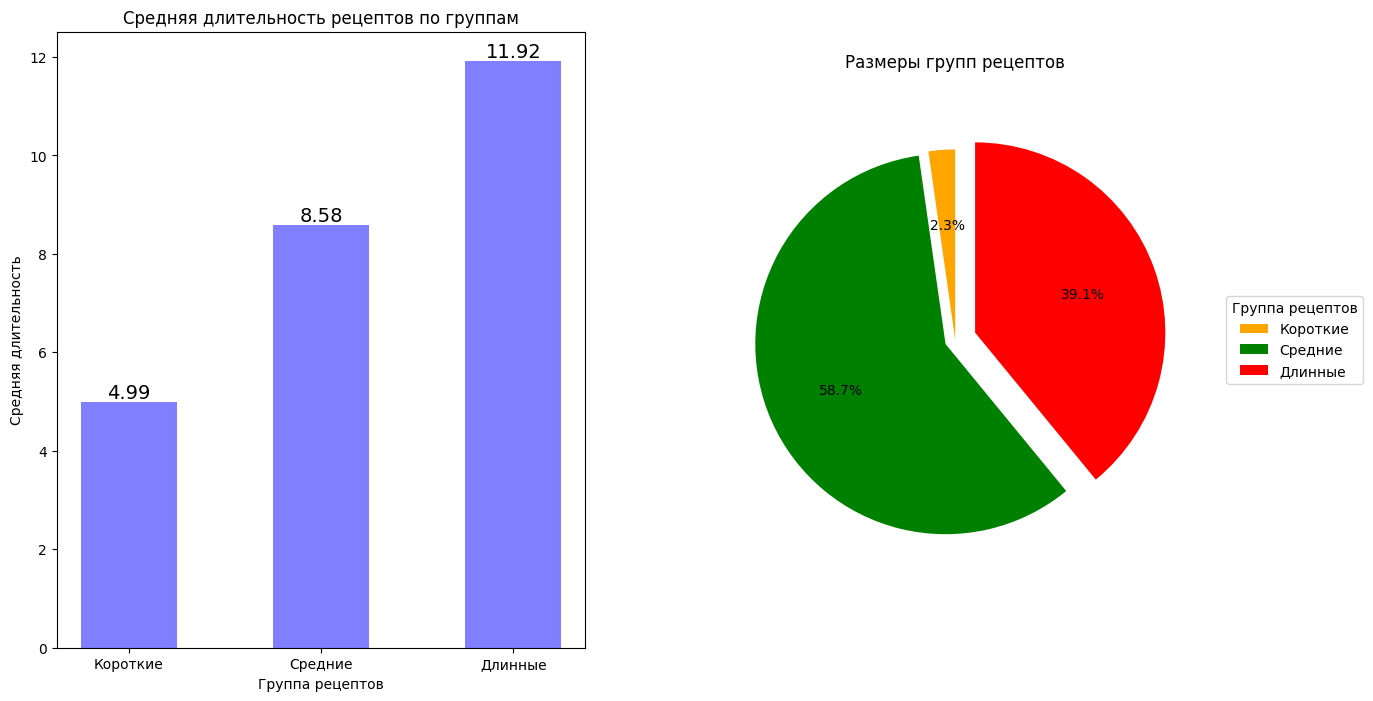

In [49]:
short_recipes = recipes[recipes['minutes'] < 5]
medium_recipes = recipes[(recipes['minutes'] >= 5) & (recipes['minutes'] < 50)]
long_recipes = recipes[recipes['minutes'] >= 50]

mD = [short_recipes['n_steps'].mean(), medium_recipes['n_steps'].mean(), long_recipes['n_steps'].mean()]
group_s = [len(short_recipes), len(medium_recipes), len(long_recipes)]

fig, axs = plt.subplots(ncols=2, figsize=(15, 8))

axs[0].bar(['Короткие', 'Средние', 'Длинные'], mD, color='blue', alpha=0.5, width=0.5)
axs[0].set_xlabel('Группа рецептов')
axs[0].set_ylabel('Средняя длительность')
axs[0].set_title('Средняя длительность рецептов по группам')
for i, val in enumerate(mD):
    axs[0].text(i, val, str(round(val, 2)), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontsize': 14})


axs[1].pie(group_s, colors=['orange', 'green', 'red'], autopct='%1.1f%%', explode=(0, 0.05, 0.1), startangle=90, radius=0.9)
axs[1].legend(['Короткие', 'Средние', 'Длинные'], title='Группа рецептов', loc='center left', bbox_to_anchor=(1, 0.5))
axs[1].set_title('Размеры групп рецептов')

plt.show()

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

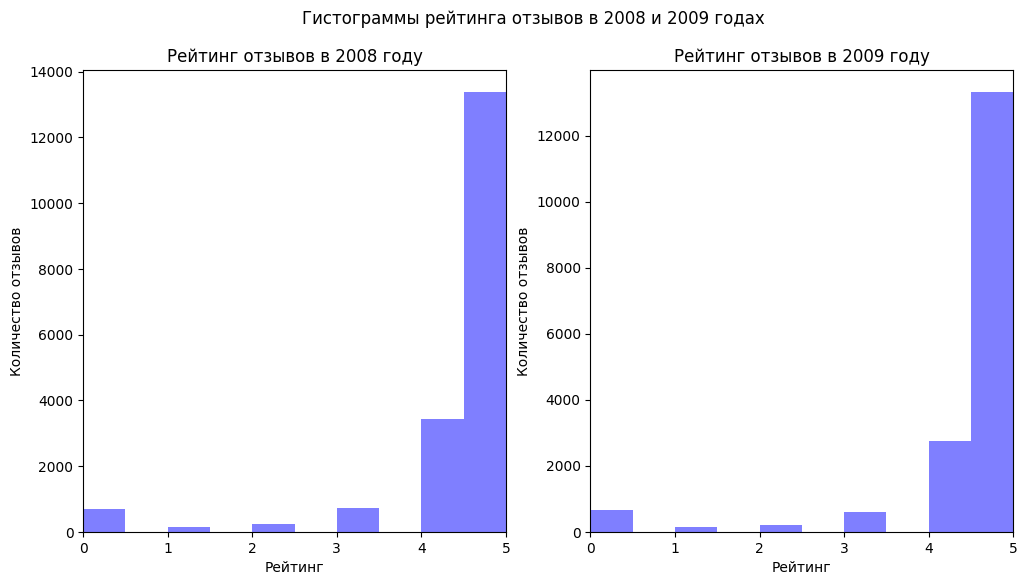

In [56]:
reviews_sort = reviews[reviews['date'].str.contains('2008|2009')]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
titles = ['Рейтинг отзывов в 2008 году', 'Рейтинг отзывов в 2009 году']

for i, year in enumerate([2008, 2009]):
    axes[i].hist(reviews_sort[reviews_sort['date'].str.contains(str(year))]['rating'], bins=10, color='blue', alpha=0.5)
    axes[i].set_xlabel('Рейтинг')
    axes[i].set_ylabel('Количество отзывов')
    axes[i].set_title(titles[i])
    axes[i].set_xlim([0, 5])

fig.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах')
axes[1].set_ylabel('Количество отзывов')

plt.show()

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

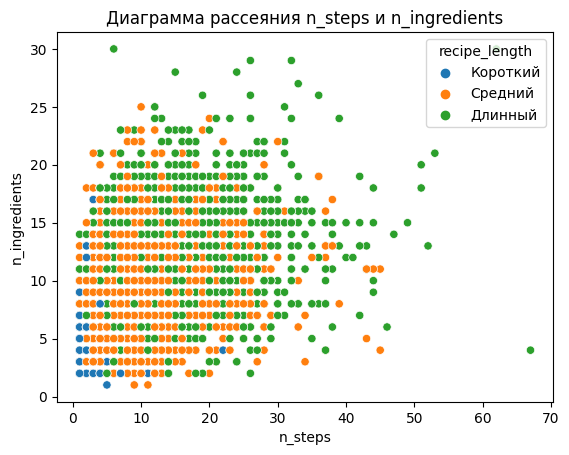

In [57]:
recipes['recipe_length'] = pd.cut(recipes['minutes'], bins=[0, 5, 50, float('inf')], labels=['Короткий', 'Средний', 'Длинный'])
sns.scatterplot(data=recipes, x='n_steps', y='n_ingredients', hue='recipe_length')
plt.title('Диаграмма рассеяния n_steps и n_ingredients')
plt.show()

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

Text(0.5, 1.0, 'Корреляционная матрица числовых столбцов таблиц recipes и reviews')

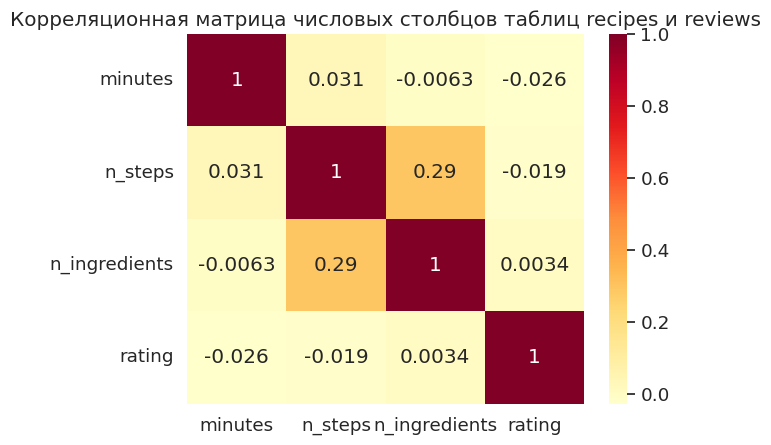

In [59]:
merged_df = pd.merge(recipes, reviews, left_on='id', right_on='recipe_id')
numeric_cols = ['minutes', 'n_steps', 'n_ingredients', 'rating']
numeric_df = merged_df[numeric_cols]
corr = numeric_df.corr()
sns.set(style='white')
sns.set(font_scale=1.2)
heatmap = sns.heatmap(corr, annot=True, cmap='YlOrRd')
heatmap.set_title('Корреляционная матрица числовых столбцов таблиц recipes и reviews')
